<a href="https://colab.research.google.com/github/srijan-27/LGMVIP-DataScience/blob/main/Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LGM VIP Task-3: Develop A Neural Network That Can Read Handwriting**

> **Executed by: Srijan Rastogi | srastogi751@gmail.com**



### **Importing the Libraries**

In [1]:
import tensorflow as tf
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

### **Load Dataset**

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### **Reshaping the trainning and testing dataset**

In [3]:
x_train =x_train.reshape((x_train.shape[0] ,x_train.shape[1], x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] ,x_test.shape[1], x_test.shape[2],1))

### **Normalize the value of pixels in images**

In [4]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

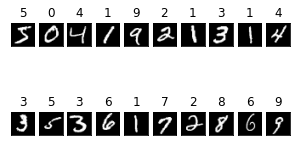

In [5]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
  ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

### **Determine the shape of input image**

In [6]:
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

### **Defining the model**

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


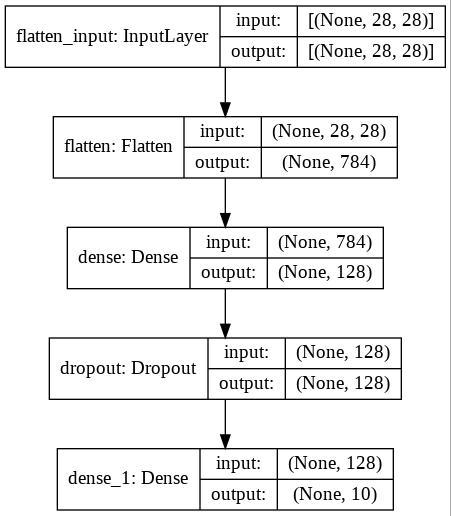

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes=True)

In [10]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.527384  ,  0.1464605 ,  0.61826664, -0.40130395,  0.4385426 ,
        -0.05730604, -0.01644266,  0.0780267 ,  0.20525397, -0.25201723]],
      dtype=float32)

In [11]:
tf.nn.softmax(predictions).numpy()

array([[0.05445318, 0.10682432, 0.17122728, 0.06177021, 0.1430605 ,
        0.08713154, 0.09076579, 0.09975846, 0.11329319, 0.07171558]],
      dtype=float32)

### **Compling The Model**

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

### **Train the model**

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1484 - accuracy: 0.9553
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1092 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0904 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9761


### **Model Evaluation**

In [14]:
model.evaluate(x_test,  y_test, verbose=5)

[0.07231943309307098, 0.9775999784469604]

### **Probablity of the model**

In [15]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[5.9795184e-08, 4.9562185e-09, 1.4966492e-05, 4.8601483e-05,
        2.7074487e-11, 2.6612003e-08, 4.9195993e-13, 9.9993002e-01,
        1.5740747e-07, 6.1209507e-06],
       [1.0853594e-05, 7.9688914e-05, 9.9988723e-01, 9.2921191e-06,
        3.6807377e-16, 5.5401015e-06, 2.2486929e-06, 6.1991612e-13,
        5.1156367e-06, 7.2234610e-16],
       [8.0486124e-08, 9.9965978e-01, 2.1155965e-05, 3.2438279e-06,
        6.2002332e-06, 4.0254270e-07, 1.5738872e-06, 2.9345645e-04,
        1.4125567e-05, 6.0500987e-08],
       [9.9788982e-01, 6.7128418e-09, 1.7992001e-03, 8.0530981e-07,
        2.0360335e-07, 3.9359969e-05, 2.5099964e-04, 2.0661496e-06,
        9.2036038e-07, 1.6530515e-05],
       [1.1251940e-06, 3.3265264e-09, 5.7689949e-06, 4.8938833e-08,
        9.9960941e-01, 1.4140436e-07, 7.8347999e-05, 1.1337394e-05,
        2.3736732e-07, 2.9355954e-04]], dtype=float32)>

### **Testing the model**

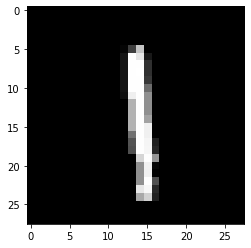

In [16]:
img = x_train[8]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [17]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted: {}".format(argmax(p)))

predicted: 1


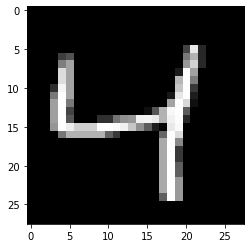

In [18]:
img = x_train[2]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [19]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted: {}".format(argmax(p)))

predicted: 4


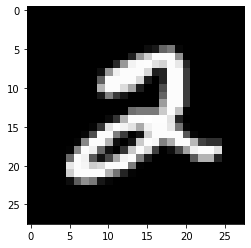

In [20]:
img = x_train[5]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [21]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted: {}".format(argmax(p)))

predicted: 2
